# Практическая работа №4

Выполнил студент группы М06-106н Кочетков Дмитрий Андреевич.

## Постановка задачи

Необходимо программно реализовать следующие операции для АВЛ-дерева (самобалансируемое двоичное дерево поиска):
1.	Создание дерева из списка;
2.	Добавление элемента в дерево;
3.	Удаление элемента из дерева;
4.	Балансировка дерева;
5.	Визуализация дерева.

Создать собственный класс `AVLTree`, реализующий описанный выше функционал.
В тестовой части визуализировать АВЛ-дерево до и после тестируемой операции.
В расчетной части построить зависимость высоты АВЛ-дерева от количества его узлов. Сравнить с теоретической оценкой.

## Реализация AVLTree

In [41]:
class AVLTree:
    """
    Конструктор, создает дерево со значением value в корневом узле и без дочерних узлов
    """
    def __init__(self, value):
        self.value = value
        self.l = None
        self.r = None
        self.height = 0
        self.balance = 0

    @classmethod
    def from_list(cls, numbers: list):
        numbers = sorted(numbers)
        if len(numbers) > 0:
            mid = len(numbers) // 2
            result = cls(numbers[mid])

            result.l = cls.from_list(numbers[:mid])
            result.r = cls.from_list(numbers[mid+1:])

            max_children_height = 0
            balance = 0
            if result.l != None:
                max_children_height = max(max_children_height, result.l.height)
                balance += result.l.height
            
            if result.r != None:
                max_children_height = max(max_children_height, result.r.height)
                balance -= result.r.height
            
            result.height = max_children_height + 1
            result.balance = balance
        
            return result
    
    """
    Вывод дерева в текстовом формате.
    """
    def __str__(self, level=0):
        ret = "   " * level + repr(self.value)+"\n"
        if self.l != None:
            ret += self.l.__str__(level+1)
        if self.r != None:
            ret += self.r.__str__(level+1)
        return ret

    def __repr__(self):
        return self.__str__(level=0)

## Создание дерева из списка

In [49]:
tree = AVLTree.from_list([13, 10, 14, 4, 7, 1, 6, 8, 3])
tree

7
   4
      3
         1
      6
   13
      10
         8
      14

In [50]:
tree.height

4

In [51]:
tree.balance

0

## Добавление элемента

In [45]:
tree.add(11)
tree

7
   4
      3
         1
      6
   13
      10
         8
         11
      14

## Удаление элемента

## Балансировка

## Зависимость высоты дерева от количества элементов

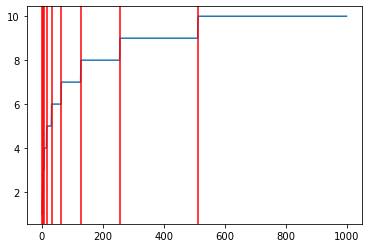

In [62]:
import random
from matplotlib import pyplot as plt

size = list()
height = list()

for i in range(1, 1000):
    size.append(i)
    arr = random.sample(range(1, 20000), i)
    height.append(AVLTree.from_list(arr).height)

plt.plot(size, height)
for i in range(1, 10):
    plt.axvline(x = 2 ** i, color='red')
plt.show()

Синий график отображает зависимость высоты дерева $h$ от количества его элементов $x$. Красные линии - это такие значения $x$, которые соответствуют натуральным степеням двойки. Таким образом, из графика видно, что $h=\lfloor \log_2x \rfloor$.

## Вывод